In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv(r"C:\Users\26477\Desktop\boston\1 - 副本.csv")
dataset.head()

,"Initial Conc, g/L","Dosage, mg/L","Residence time, min",pH,Pb(II) removal (%)
0,32.5,0.275,95,4.5,68.51
1,32.5,0.625,45,4.5,74.04
2,55.0,0.450,70,4.0,58.76
3,55.0,0.450,120,4.0,63.48
4,55.0,0.800,70,4.0,73.55


In [6]:
dataset.shape

(30, 5)

In [7]:
dataset.columns

Index(['Initial Conc, g/L', 'Dosage, mg/L', 'Residence time, min', 'pH',
       'Pb(II) removal (%)'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Initial Conc, g/L    30 non-null     float64
 1   Dosage, mg/L         30 non-null     float64
 2   Residence time, min  30 non-null     int64  
 3   pH                   30 non-null     float64
 4   Pb(II) removal (%)   30 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


In [9]:
dataset.describe()

,"Initial Conc, g/L","Dosage, mg/L","Residence time, min",pH,Pb(II) removal (%)
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,55.000000,0.450000,70.000000,4.000000,55.614333
std,20.468647,0.159201,22.742941,0.454859,15.607321
min,10.000000,0.100000,20.000000,3.000000,25.980000
25%,32.500000,0.275000,45.000000,3.500000,43.582500
50%,55.000000,0.450000,70.000000,4.000000,58.760000
75%,77.500000,0.625000,95.000000,4.500000,65.160000
max,100.000000,0.800000,120.000000,5.000000,85.060000


#特征提取

In [10]:
feature_columns = ['Pb(II) removal (%)']
label_columns = ['Initial Conc, g/L']
feature = dataset[feature_columns]
label = dataset[label_columns]
feature.head()

,Pb(II) removal (%)
0,68.51
1,74.04
2,58.76
3,63.48
4,73.55


In [12]:
label.head()

,"Initial Conc, g/L"
0,32.5
1,32.5
2,55.0
3,55.0
4,55.0


In [13]:
type(feature)

pandas.core.frame.DataFrame

In [14]:
X = feature.values
Y = label.values
X

array([[68.51],
       [74.04],
       [58.76],
       [63.48],
       [73.55],
       [65.72],
       [51.81],
       [39.04],
       [35.25],
       [32.94],
       [40.78],
       [25.98],
       [58.76],
       [58.76],
       [61.55],
       [57.  ],
       [32.46],
       [47.73],
       [58.76],
       [83.3 ],
       [58.76],
       [52.29],
       [67.08],
       [76.34],
       [58.76],
       [50.04],
       [42.2 ],
       [85.06],
       [30.48],
       [59.24]])

##建立模型
拆分数据，四分之三的数据作为训练集，四分之一的数据作为测试集

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [21]:
Y_pred = regressor.predict(X_test)
X_test


array([[58.76],
       [30.48],
       [58.76],
       [40.78],
       [42.2 ],
       [58.76],
       [85.06],
       [25.98]])

In [23]:
Y_pred

array([[52.76658819],
       [82.81204061],
       [52.76658819],
       [71.86903637],
       [70.36038918],
       [52.76658819],
       [24.82474241],
       [87.5929648 ]])

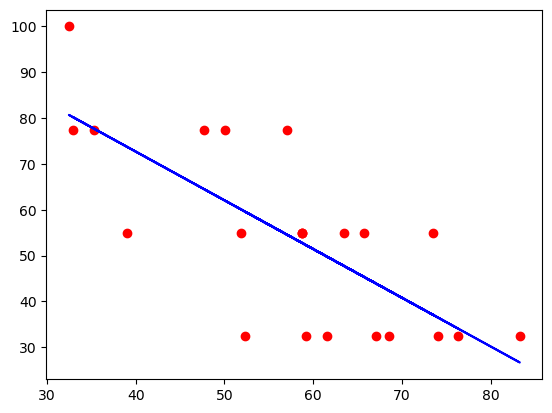

In [22]:
# 散点图：红色点表示训练集的点
plt.scatter(X_train , Y_train, color = 'red')
# 线图：蓝色线表示由训练集训练出的线性回归模型
plt.plot(X_train , regressor.predict(X_train), color ='blue')
plt.show()

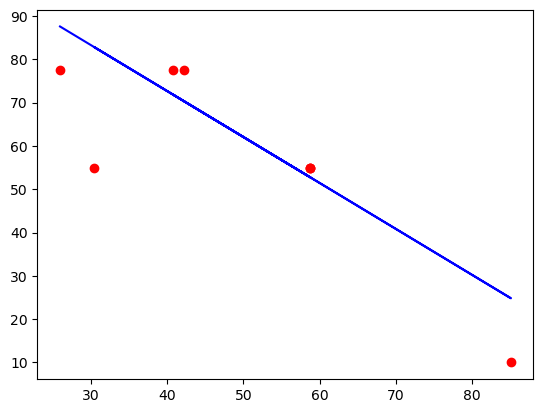

In [24]:
# 散点图：红色点表示测试集的点
plt.scatter(X_test , Y_test, color = 'red')
# 线图：蓝色线表示对测试集进行预测的结果
plt.plot(X_test , regressor.predict(X_test), color ='blue')
plt.show()